# We would start the analysis by taking a look at the label data first

In [1]:
import pandas as pd
label_df = pd.read_csv("../cleaned_dataset/cleaned_label_loc.csv")

In [2]:
label_df.head()

,started_at,finished_at,room,floor
0,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,kitchen,5th
1,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,cafeteria,5th
2,2023-04-10 14:22:23+09:00,2023-04-10 14:23:25+09:00,kitchen,5th
3,2023-04-10 14:23:29+09:00,2023-04-10 14:23:44+09:00,cleaning,5th
4,2023-04-10 14:23:42+09:00,2023-04-10 14:24:05+09:00,nurse station,5th


### Check the rooms be visited by caregivers

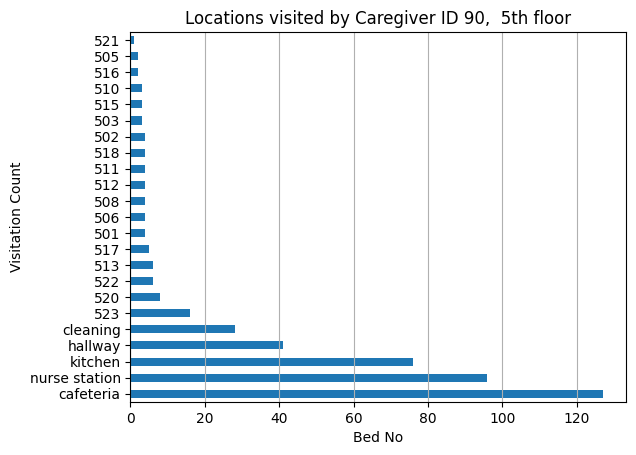

In [4]:
label_df['room'].value_counts().plot(kind='barh', xlabel= 'Bed No', ylabel= 'Visitation Count', title='Locations visited by Caregiver ID 90,  5th floor').grid(axis='x')

We can see that there would obviously be some imbalance of data here
--> some location are visited so much, compared to some which are just visited a few times

#### Now we would go deeper, instead of just the count of times a room be visited, we would want to count the total time caregiver spent at each rooms 

In [ ]:
# create a feature duration for the df 
label_df["started_at"] = pd.to_datetime(label_df["started_at"])
label_df["finished_at"] = pd.to_datetime(label_df["finished_at"])
duration = label_df["finished_at"] - label_df["started_at"]
duration.head()

0   0 days 00:00:04
1   0 days 00:00:21
2   0 days 00:01:02
3   0 days 00:00:15
4   0 days 00:00:23
dtype: timedelta64[ns]

In [7]:
#display duration in minutes
duration_s = duration.dt.total_seconds()
duration_min = duration_s/60
duration_min.head()

0    0.066667
1    0.350000
2    1.033333
3    0.250000
4    0.383333
dtype: float64

In [8]:
label_df["duration"] = duration_min

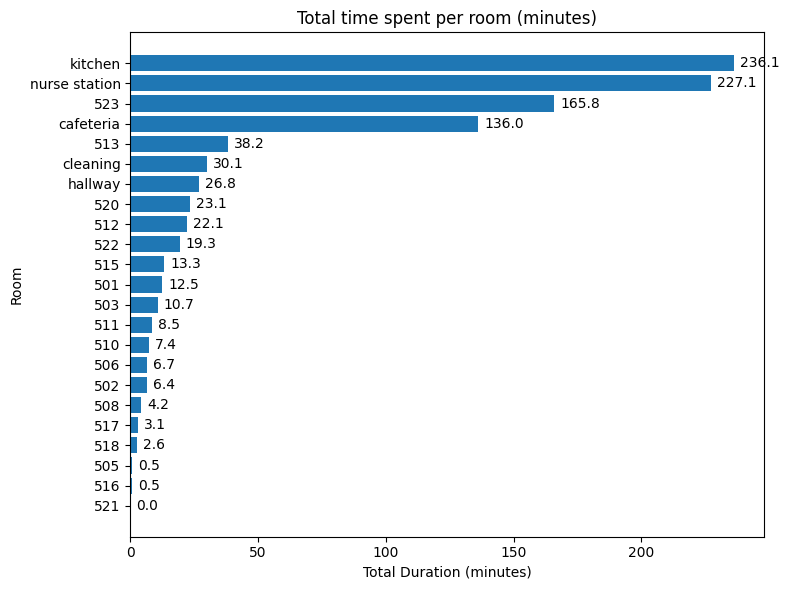

In [11]:
# total duration (in minutes) spent per room
duration_by_room = label_df.groupby('room')['duration'].sum().sort_values(ascending=False).reset_index(name='total_minutes')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(duration_by_room['room'], duration_by_room['total_minutes'], color='C0')
ax.invert_yaxis()
ax.set_xlabel('Total Duration (minutes)')
ax.set_ylabel('Room')
ax.set_title('Total time spent per room (minutes)')
offset = duration_by_room['total_minutes'].max() * 0.01
for i, v in enumerate(duration_by_room['total_minutes']):
    ax.text(v + offset, i, f"{v:.1f}", va='center')
plt.tight_layout()
plt.show()

# Now we would take a look at the BLE data

In [17]:
ble_df = pd.read_csv("../cleaned_dataset/cleaned_ble_data.csv")

In [18]:
ble_df.head()

,timestamp,mac address,RSSI,power
0,2023-04-10 13:00:00+09:00,4,-91,-2147483648
1,2023-04-10 13:00:00+09:00,6,-96,-2147483648
2,2023-04-10 13:00:00+09:00,6,-96,-2147483648
3,2023-04-10 13:00:00+09:00,6,-96,-2147483648
4,2023-04-10 13:00:00+09:00,6,-96,-2147483648


In [19]:
ble_df.shape

(1673395, 4)

### See the counts of mac address / how each id appears

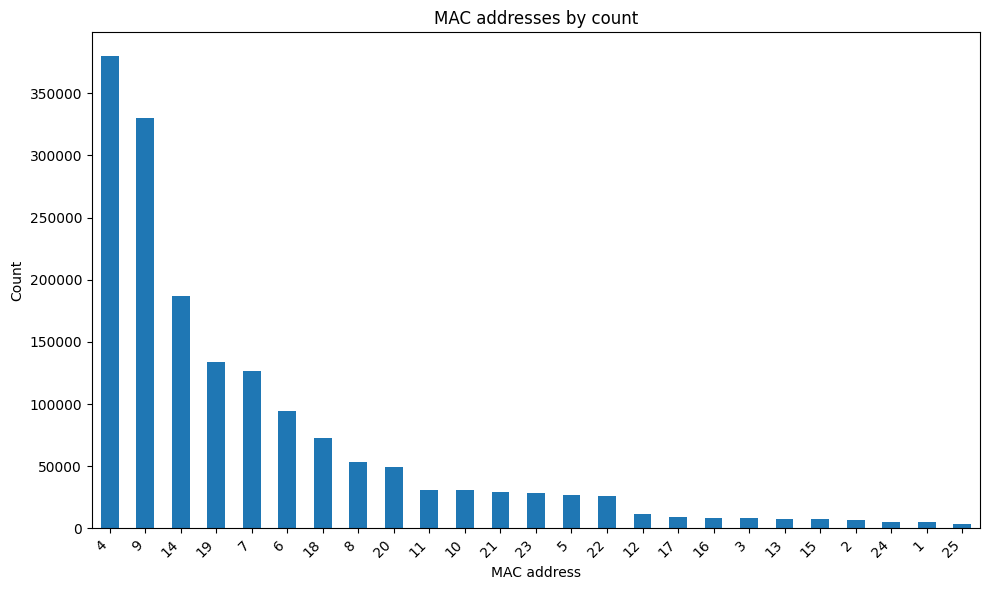

In [23]:
# plot MAC addresses by count
counts = ble_df["mac address"].value_counts()
top_n = 25

fig, ax = plt.subplots(figsize=(10, 6))
counts.head(top_n).plot(kind='bar', ax=ax, color='C0')
ax.set_xlabel('MAC address')
ax.set_ylabel('Count')
ax.set_title(f'MAC addresses by count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### check range of RSSI per beacon mac address

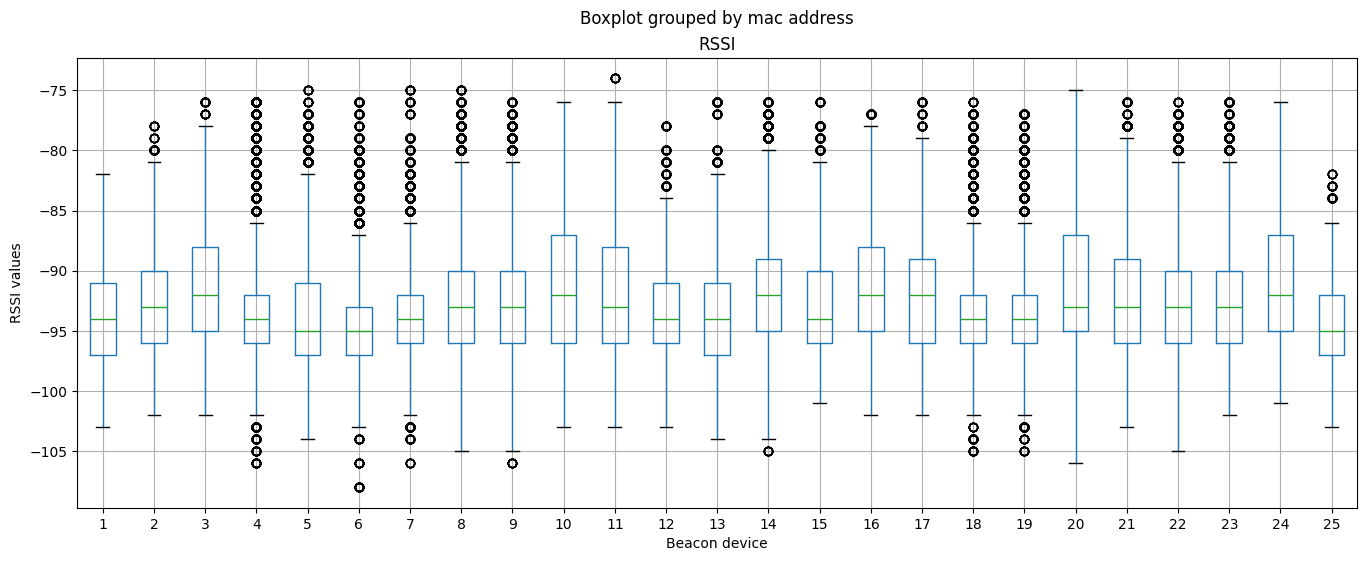

In [22]:
# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(16, 6))  # Adjust the width as desired

# Generate the boxplot
ble_df.boxplot(by="mac address", column='RSSI', ax=ax)

# Set the x-axis label and y-axis label
ax.set_xlabel('Beacon device')
ax.set_ylabel('RSSI values')

plt.show()